<h1>Green Screen</h1>
<p>The project demonstrates how to implement the green screen effect with the PIL library</p>
<p>Here is the <a href="https://pillow.readthedocs.io/en/stable/">PIL Documentation</a></p>

<h2>Import resources</h2>

In [1]:
from PIL import Image
from __future__ import print_function

<h2>Read in and display the image</h2>

In [2]:
# Creates the Image object for foreground and background
fore = Image.open("spiderman.jpg")
back = Image.open("nyc-skyline.jpg")

# Fore
print("Type: " + fore.format + ", Dimensions: "\
      + str(fore.size) + ", Mode: " + fore.mode)
# Back
print("Type: " + back.format + ", Dimensions: "\
      + str(back.size) + ", Mode: " + back.mode)

# Displays image on seperate tab
fore.show()
back.show()

Type: JPEG, Dimensions: (852, 480), Mode: RGB
Type: JPEG, Dimensions: (1280, 853), Mode: RGB


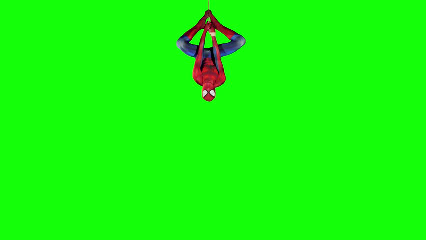

In [3]:
# Displaying image on notebook
width, height = fore.size
smaller_area = (width//2, height//2)
fore.resize(smaller_area)

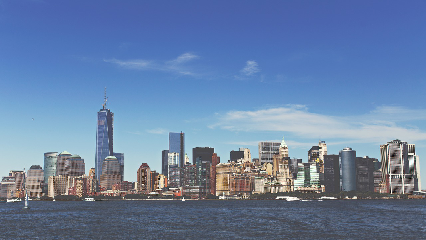

In [4]:
back.resize(smaller_area)

<h2>Convert image size</h2>

In [5]:
# The function compares the areas of both images and returns the smaller height and width
def smaller_size(img1, img2):
    area1, area2 = get_area(img1), get_area(img2) 
    if area1 < area2:
        return img1.size
    return img2.size

# The function returns the area of the image
def get_area(img):
    width, height = img.size
    return width * height

print("Fore: " + str(get_area(fore)) +" px^2")
print("Back: " + str(get_area(back)) + " px^2")
print("Smaller image dimensions: " + str(smaller_size(fore, back)))

Fore: 408960 px^2
Back: 1091840 px^2
Smaller image dimensions: (852, 480)


<h2>Green screen maker</h2>

In [6]:
# The function returns the red, green, blue values of the pixel
def get_pixel(img, x, y):
    r, g, b = img.getpixel((x, y))
    return r, g, b

# The function takes the frontground image and replaces the green with the background pixels
def green_screen(img1, img2):
    
    # comparing both areas of the images and resizing the bigger image
    # so both images are the same size
    area = smaller_size(img1, img2)
    if get_area(img1) > get_area(img2):
        img1 = img1.resize(area)
    elif get_area(img1) < get_area(img2):
        img2 = img2.resize(area)
    
    # takes each pixel of frontground and see if the green value is greater than
    # the sum of the red and blue values, if they are, then replace the pixels with
    # pixels from the background
    px1 = img1.load()
    for x in range(area[0]):
        for y in range(area[1]):
            pixel = get_pixel(img1, x, y)
            if pixel[0] + pixel[2] < pixel[1]:
                px1[x,y] = get_pixel(img2, x, y)
    return img1

<h2>Testing</h2>

In [7]:
def main():
    global new_image
    new_image = green_screen(fore, back)
    
    # saves the new image
    new_image.save("new-image.jpg", "JPEG")
    new_image.show()
if __name__ == "__main__":
    main()    

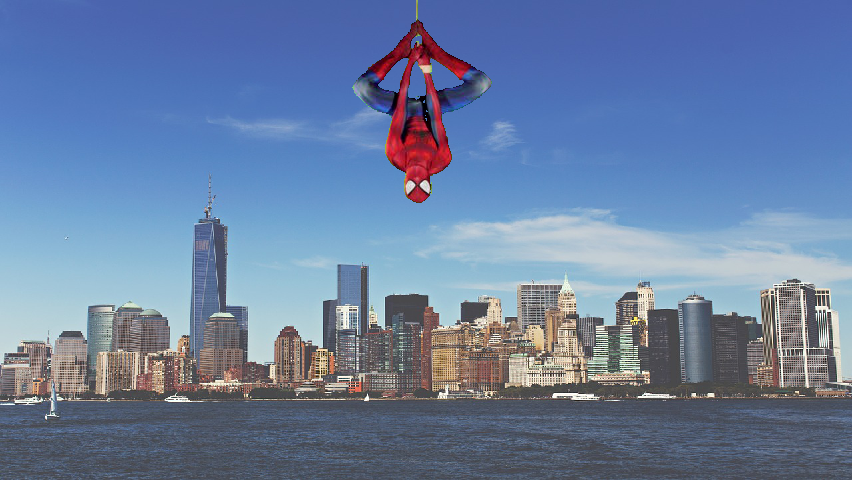

In [8]:
new_image